In [172]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

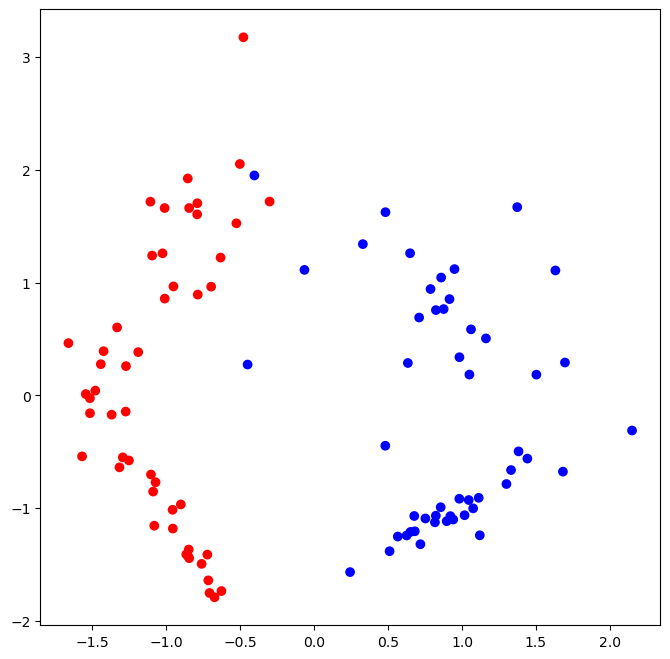

In [173]:
# сгеренируем данные
classes = datasets.make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, n_classes=2, random_state=1)

# и изобразим их на графике
colors = ListedColormap(['red', 'blue'])

plt.figure(figsize=(8, 8))
plt.scatter([x[0] for x in classes[0]], [x[1] for x in classes[0]], c=classes[1], cmap=colors)
plt.show()

In [174]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [175]:

# перемешивание датасета
np.random.seed(12) # это число позволяет постоянно получать одну и ту же "случайность"
shuffle_index = np.random.permutation(classes[0].shape[0])
X_shuffled, y_shuffled = classes[0][shuffle_index], classes[1][shuffle_index]

# разбивка на обучающую и тестовую выборки
train_proportion = 0.7
train_test_cut = int(len(classes[0]) * train_proportion)

X_train, X_test, y_train, y_test = \
    X_shuffled[:train_test_cut], \
    X_shuffled[train_test_cut:], \
    y_shuffled[:train_test_cut], \
    y_shuffled[train_test_cut:]

print("Размер массива признаков обучающей выборки", X_train.shape)
print("Размер массива признаков тестовой выборки", X_test.shape)
print("Размер массива ответов для обучающей выборки", y_train.shape)
print("Размер массива ответов для тестовой выборки", y_test.shape)

Размер массива признаков обучающей выборки (70, 2)
Размер массива признаков тестовой выборки (30, 2)
Размер массива ответов для обучающей выборки (70,)
Размер массива ответов для тестовой выборки (30,)


In [176]:
X_train_tr = X_train.transpose()
y_train_tr = y_train.reshape(1, y_train.shape[0])
X_test_tr = X_test.transpose()
y_test_tr = y_test.reshape(1, y_test.shape[0])

In [206]:
def log_loss(w, X, y):
    n = X.shape[1]
    z = np.dot(X.T, w)
   
    sigm = sigmoid(z)

    # Вычисление функции потерь
    loss = (-1/n) * np.sum(y.T * np.log(sigm) + (1 - y.T) * np.log(1 - sigm))
    
    # Вычисление градиента
    grad = (1/n) * np.dot(X, (sigm - y.T))

    return loss, grad

def optimize(w, X, y, n_iterations, eta):

    losses = []

    for i in range(n_iterations):
        loss, grad = log_loss(w, X, y)
        w = w - eta * grad

        losses.append(loss)

    return w, losses

def predict(w, X, b=0.5):

    y_pred = [[]]

    for i in range(X.shape[1]):
        if sigmoid(np.dot(X.T[i], w)) >= b:
            y_pred[0].append([1])
        else:
            y_pred[0].append([0])
    
    return y_pred

In [208]:
# инициализируем начальный вектор весов
w0 = np.zeros((X_train_tr.shape[0], 1))

n_iterations = 1000
eta = 0.05

w, losses = optimize(w0, X_train_tr, y_train_tr, n_iterations, eta)

y_predicted_test = predict(w, X_test_tr)
y_predicted_train = predict(w, X_train_tr)

# В качестве меры точности возьмем долю правильных ответов
train_accuracy = 100.0 - np.mean(np.abs(y_predicted_train - y_train_tr.T)*100.0)
test_accuracy = 100.0 - np.mean(np.abs(y_predicted_test - y_test_tr.T)*100.0)

print(f"Итоговый вектор весов w: {w}")
print(f"Точность на обучающей выборке: {train_accuracy:.3f}")
print(f"Точность на тестовой выборке: {test_accuracy:.3f}")

Итоговый вектор весов w: [[3.72659902]
 [0.22383415]]
Точность на обучающей выборке: 98.571
Точность на тестовой выборке: 96.667


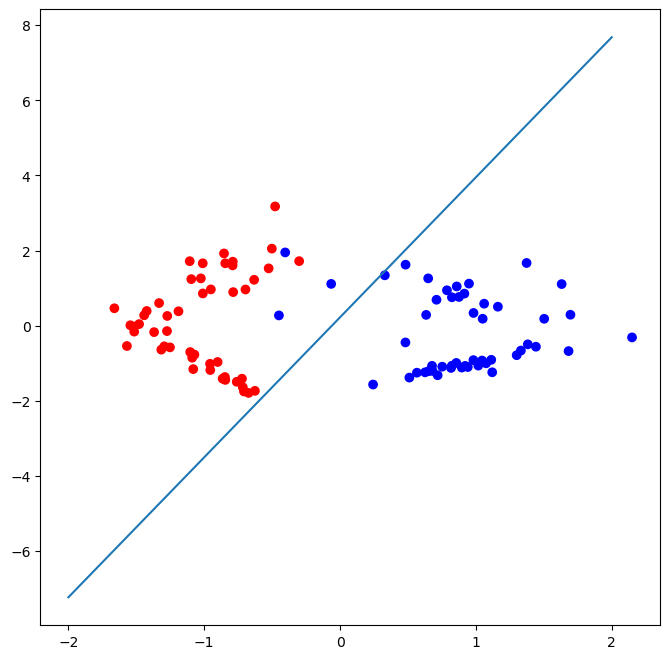

In [209]:
data = np.linspace(-2, 2, 100)

plt.figure(figsize=(8, 8))
plt.scatter([x[0] for x in classes[0]], [x[1] for x in classes[0]], c=classes[1], cmap=colors)
plt.plot(data, w[0,0]*data+w[1,0])

plt.show()

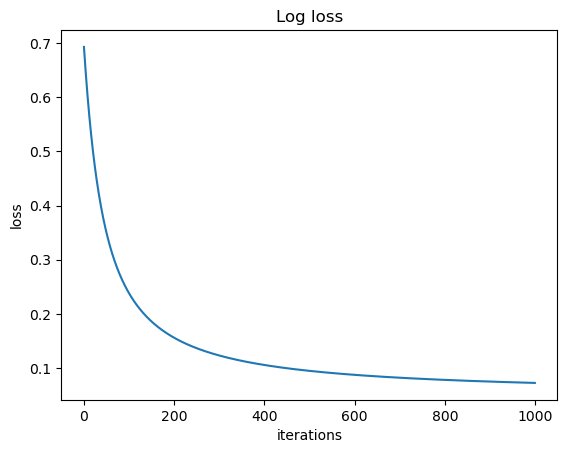

In [191]:
plt.title('Log loss')
plt.xlabel('iterations')
plt.ylabel('loss')
plt.plot(range(len(losses)), losses)

plt.show()

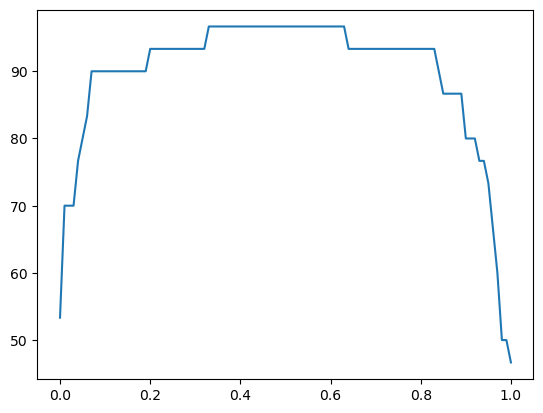

In [192]:
test_acc = []
b_l = []

for b in range(0, 101):
  y_predicted_test = predict(w, X_test_tr, b/100)
  y_predicted_train = predict(w, X_train_tr, b/100)

  # В качестве меры точности возьмем долю правильных ответов

  test_accuracy = 100.0 - np.mean(np.abs(y_predicted_test-y_test_tr.T)*100.0)

  b_l.append(b/100)
  test_acc.append(test_accuracy)

plt.plot(b_l, test_acc)
plt.show()